2. 假设有n位内存可用，集合S中有m个成员。将n位内存分为k组，使用一个哈希函数，每次哈希到每组中对应的位置（而不是使用k个哈希函数），试计算误判率。这种方法和使用k个哈希函数有何区别？

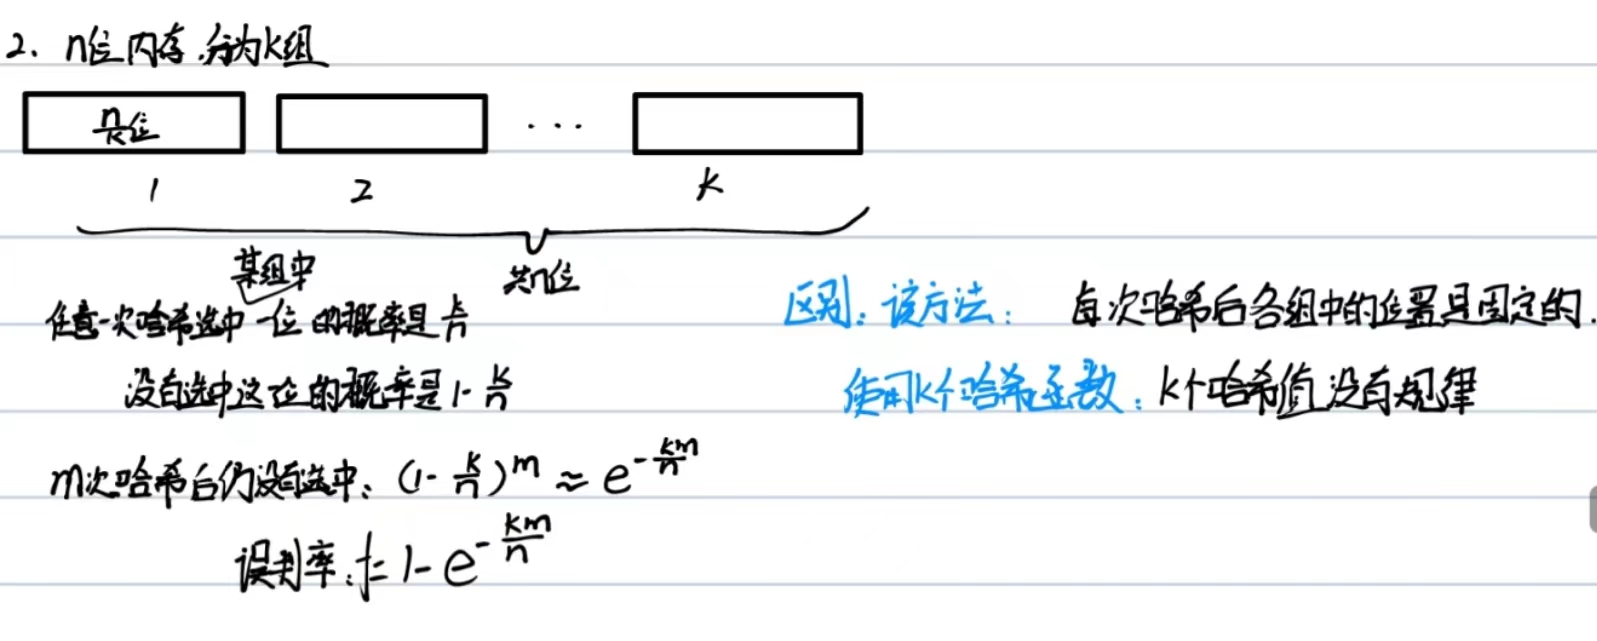

3. 给定a、b两个文件各放50亿个URL，每个URL各占64B，内存限制是4GB，试找出a、b文件共同的URL。

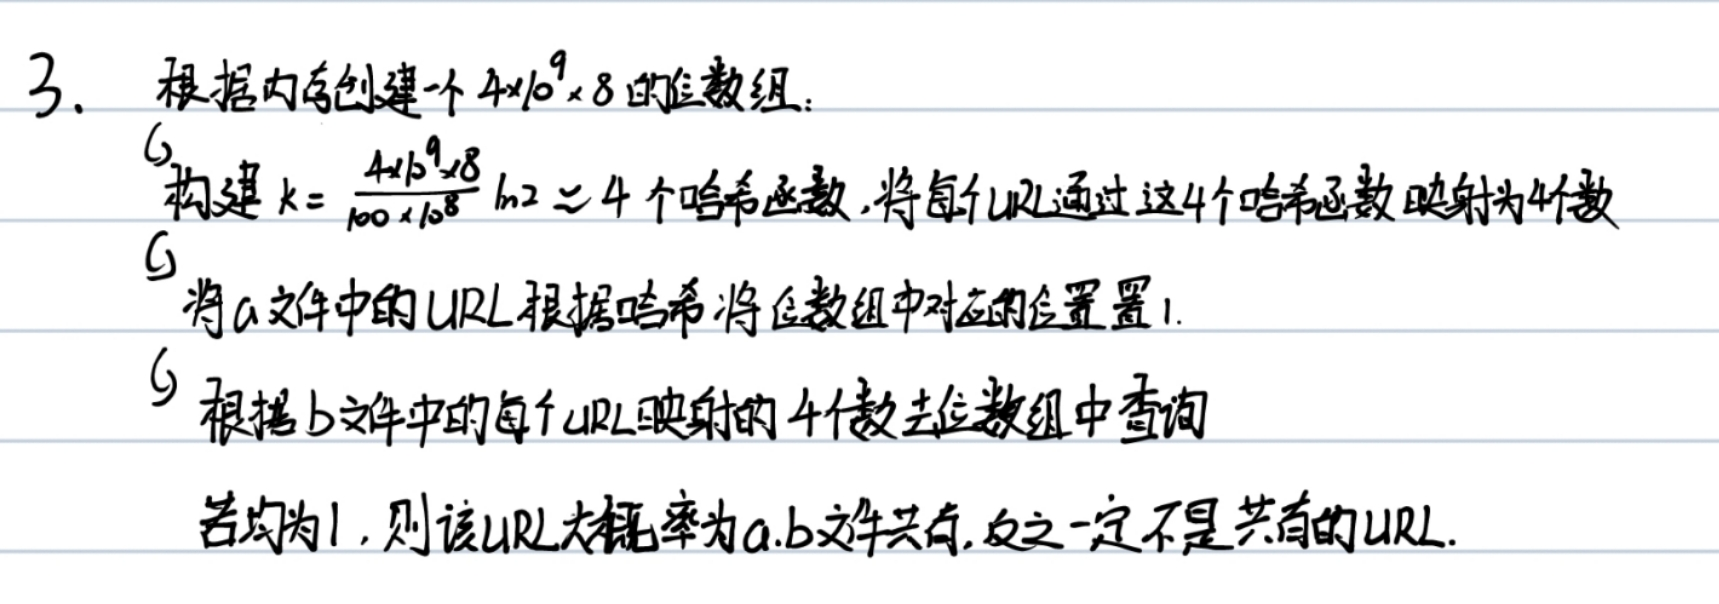

5. 计算以下三个集合的两两之间的Jaccard相似度：
$$
\{ 1,2,3,4\}, \{ 2,3,5,7\}, \{ 2,4,6\}
$$

In [47]:
data = [{1,2,3,4}, {2,3,5,7}, {2,4,6}]
for i in range(3):
    for j in range(i+1, 3):
        similarity = len(data[i] & data[j]) / len(data[i] | data[j]) 
        print(f"集合{(i+1)}与集合{j+1}的Jaccard相似度为{similarity:.6f}")

集合1与集合2的Jaccard相似度为0.333333
集合1与集合3的Jaccard相似度为0.400000
集合2与集合3的Jaccard相似度为0.166667


7. 证明：如果两个集合的Jaccard相似度为0，则Min-Hashing一定可以给出一个正确的估计

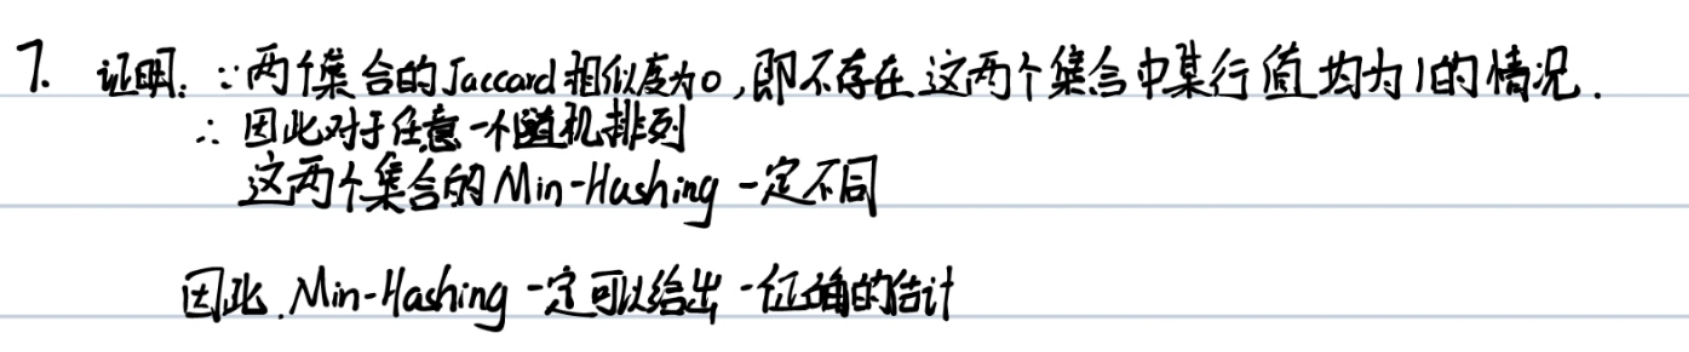

8. 设$S_1$和$S_2$为两个布尔向量，$h_1, h_2, \cdots, h_k$表示k个随机排列，$h_i(S)$记录了随机排列之后第一个行值为1的行号。试证明当$k = \large{O(\frac{ln(1/\delta)}{JS \cdot \epsilon^2})}$时，
$$
P(|{\widetilde {JS} } (S_1, S_2) - JS(S_1, S_2)| > \epsilon JS(S_1, S_2) ) < \delta
$$

其中$\widetilde{JS} = \frac{1}{k}\mathop\sum_{i=1}^{k}X_i, JS(S_1, S_2) = \large{\frac{|S_1 \cap S_2|} {|S_1 \cup  S_2 |}}$, 并且定义：



\begin{equation}
	X_i = \begin{cases}
	1, &\text{如果} h_i(S_1) = h_i(S_2) \\
	0, &\text{其他} 	
		  \end{cases}%\text是为了在数学公式中处理中文
\end{equation}


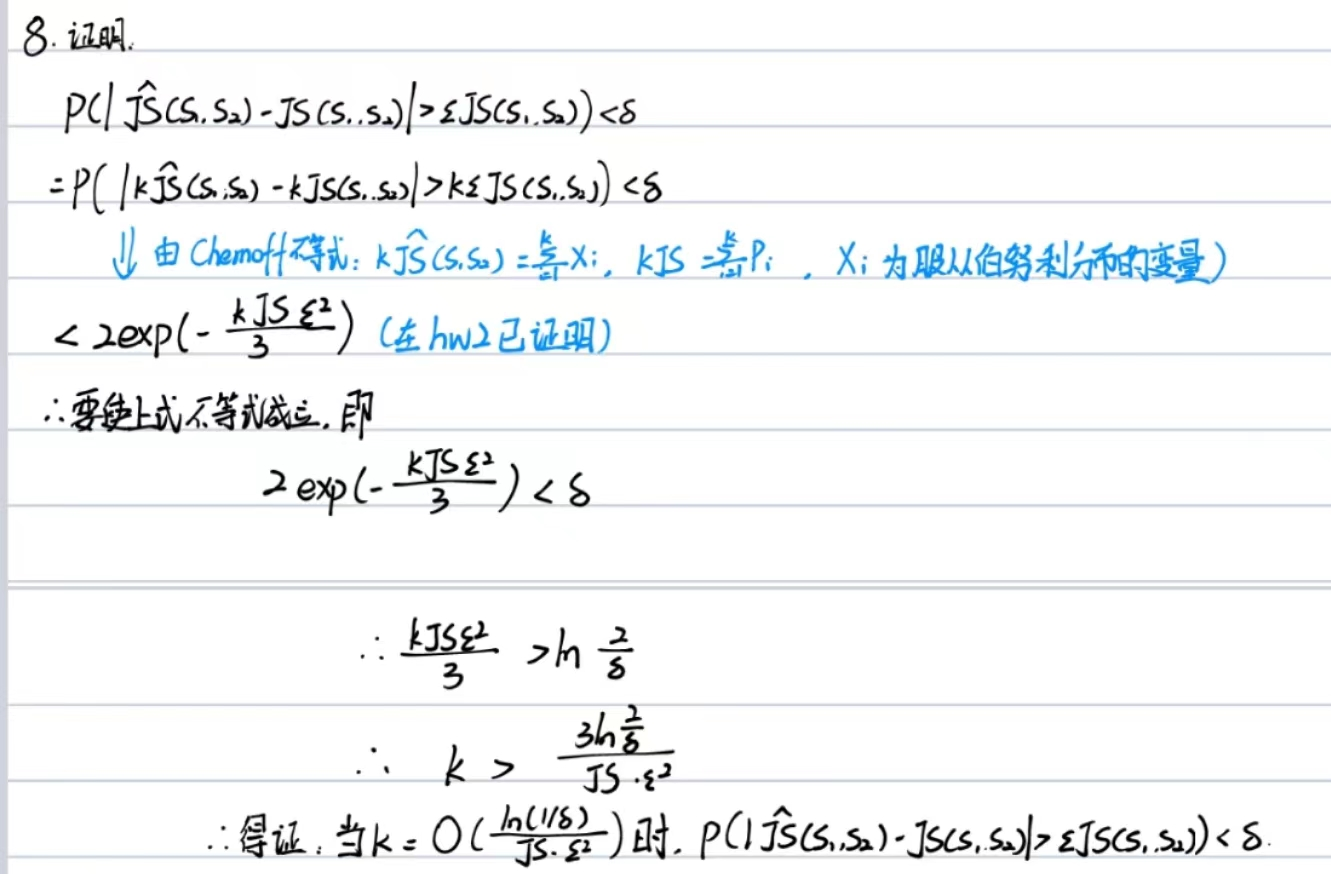

9. 根据图的集合表示，回答一下问题:
<table align="right">
    <tr>
        <th>集合</th>
        <th>$S_1$</th>
        <th>$S_2$</th>
        <th>$S_3$</th>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>2</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>3</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>4</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        
    </tr>
    <tr>
        <td>5</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        
    </tr>
    
 </table>


(1) 计算任意两列之间的Jaccard相似度

In [44]:
import numpy as np
data = np.array([[1,0,1,0,1,0], [1,1,0,0,0,0], [0,0,0,1,1,0]])

for i in range(3):
    for j in range(i+1, 3):
        similarity = sum(data[i] & data[j]) / sum(data[i] | data[j]) 
        print(f"集合S_{(i+1)}与集合S_{j+1}的Jaccard相似度为{similarity:.6f}")

集合S_1与集合S_2的Jaccard相似度为0.250000
集合S_1与集合S_3的Jaccard相似度为0.250000
集合S_2与集合S_3的Jaccard相似度为0.000000


（2）使用以下三个哈希函数，计算每一列的Min-Hashing签名。
$$
h_1(x) = 7x + 1 mod 6; 11x + 2 mod 6; h_3(x) = 5x + 2 mod 6
$$

In [37]:
import pandas as pd

In [42]:
dataset = pd.DataFrame(index=[0,1,2,3,4,5], data=data.T)

In [43]:
dataset

,0,1,2
0,1,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,1
5,0,0,0


11. 对于局部敏感哈希，假设两个集合被哈希到同一个桶中的概率为$\frac{1}{2}$,计算相似度阈值t（关于b和r的函数）